<a href="https://colab.research.google.com/github/joseph-kinama/MINST/blob/main/Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

['train.csv', 'test.csv']
(60000, 785)
(10000, 785)


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

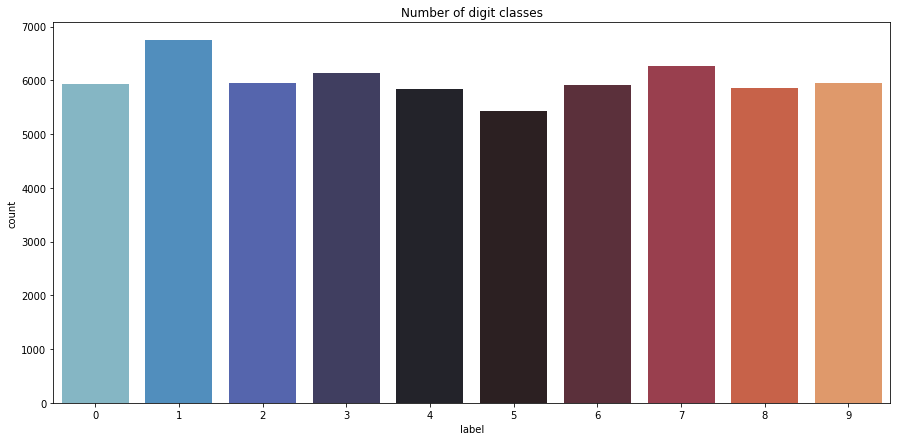

In [30]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.
# ['train.csv', 'test.csv', 'sample_submission.csv']

# read train 
train = pd.read_csv("input/train.csv",header=None)
train.rename({0:"label"},axis=1,inplace=True)
print(train.shape)
train.head()
# read test 
test= pd.read_csv("input/test.csv",header=None)
test.rename({0:"label"},axis=1,inplace=True)
print(test.shape)
test.head()
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = "label",axis = 1) 
Y_test = test.drop(labels = "label",axis = 1,inplace=True) 

# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()


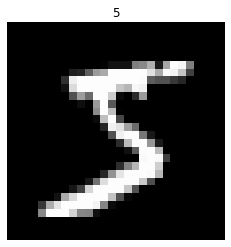

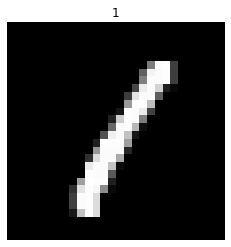

In [26]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()


In [31]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (60000, 784)
test shape:  (10000, 784)
x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


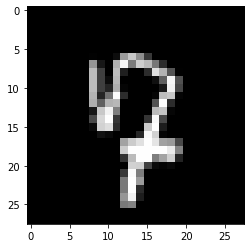

In [32]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()


Epoch 1/10
270/270 [==============================] - 39s 141ms/step - loss: 0.8572 - accuracy: 0.7144 - val_loss: 0.1653 - val_accuracy: 0.9530
Epoch 2/10
270/270 [==============================] - 38s 140ms/step - loss: 0.3536 - accuracy: 0.8889 - val_loss: 0.1151 - val_accuracy: 0.9638
Epoch 3/10
270/270 [==============================] - 38s 140ms/step - loss: 0.2622 - accuracy: 0.9192 - val_loss: 0.0815 - val_accuracy: 0.9755
Epoch 4/10
270/270 [==============================] - 38s 139ms/step - loss: 0.2285 - accuracy: 0.9299 - val_loss: 0.0686 - val_accuracy: 0.9785
Epoch 5/10
270/270 [==============================] - 38s 140ms/step - loss: 0.1980 - accuracy: 0.9394 - val_loss: 0.0676 - val_accuracy: 0.9775
Epoch 6/10
270/270 [==============================] - 38s 140ms/step - loss: 0.1818 - accuracy: 0.9450 - val_loss: 0.0557 - val_accuracy: 0.9823
Epoch 7/10
270/270 [==============================] - 38s 140ms/step - loss: 0.1684 - accuracy: 0.9490 - val_loss: 0.0533 - val_ac

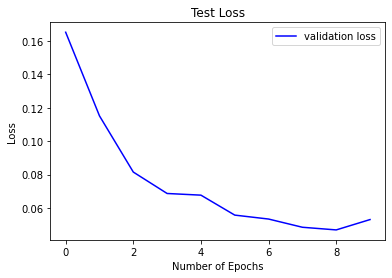

In [35]:

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile( loss = "categorical_crossentropy", metrics=["accuracy"])

# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=200),
                              epochs = 10, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // 200)
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




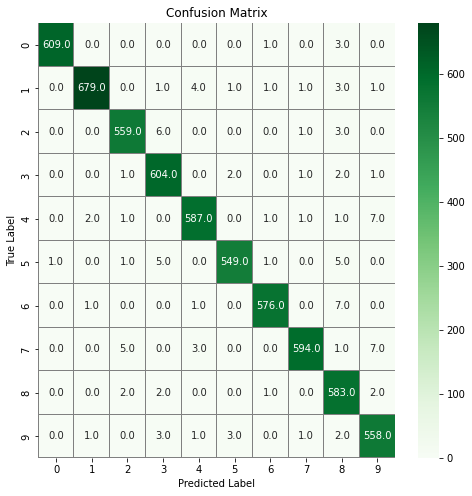

In [36]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()